In [1]:
import tensorflow as tf


2024-03-04 23:35:30.446176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 23:35:30.446284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 23:35:30.448107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 23:35:30.456272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-04 23:35:31.532975: W tensorflow/compiler/tf2

In [2]:
import numpy as np

In [3]:
arr = np.arange(9).reshape(3,3,1)
arr

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])

In [4]:
x = tf.constant(arr)
x

2024-03-04 23:35:32.751199: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-04 23:35:32.798898: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-04 23:35:32.798969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-04 23:35:32.802360: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-04 23:35:32.802449: I external/local_xla/xla/stream_executor

<tf.Tensor: shape=(3, 3, 1), dtype=int64, numpy=
array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])>

In [5]:
x+x

<tf.Tensor: shape=(3, 3, 1), dtype=int64, numpy=
array([[[ 0],
        [ 2],
        [ 4]],

       [[ 6],
        [ 8],
        [10]],

       [[12],
        [14],
        [16]]])>

In [6]:
x*5

<tf.Tensor: shape=(3, 3, 1), dtype=int64, numpy=
array([[[ 0],
        [ 5],
        [10]],

       [[15],
        [20],
        [25]],

       [[30],
        [35],
        [40]]])>

In [7]:
5*x

<tf.Tensor: shape=(3, 3, 1), dtype=int64, numpy=
array([[[ 0],
        [ 5],
        [10]],

       [[15],
        [20],
        [25]],

       [[30],
        [35],
        [40]]])>

In [8]:
tf.transpose(x)

<tf.Tensor: shape=(1, 3, 3), dtype=int64, numpy=
array([[[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]]])>

In [9]:
tf.concat([x,x], axis=2)

<tf.Tensor: shape=(3, 3, 2), dtype=int64, numpy=
array([[[0, 0],
        [1, 1],
        [2, 2]],

       [[3, 3],
        [4, 4],
        [5, 5]],

       [[6, 6],
        [7, 7],
        [8, 8]]])>

In [10]:
x[:,1,0]

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 4, 7])>

In [11]:
reshaped_tensor = tf.squeeze(x[:,1,0])
reshaped_tensor = tf.cast(reshaped_tensor, dtype=tf.float32)
reshaped_tensor


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 4., 7.], dtype=float32)>

In [12]:
tf.nn.softmax(reshaped_tensor)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.00235563, 0.04731416, 0.95033026], dtype=float32)>

In [13]:
np.sum(np.arange(9))

36

In [14]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [15]:
type(x)


tensorflow.python.framework.ops.EagerTensor

In [16]:
v = tf.Variable([1,2,3,3,3,3])

In [17]:
v.assign([1,2,3,4,5,6])

<tf.Variable 'UnreadVariable' shape=(6,) dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

In [18]:
v

<tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

In [19]:
v.assign_sub([1,1,1,1,1,1])

<tf.Variable 'UnreadVariable' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5], dtype=int32)>

In [20]:
v - 1

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([-1,  0,  1,  2,  3,  4], dtype=int32)>

In [21]:
v

<tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5], dtype=int32)>

In [22]:
y = v + 1 + 2*v + v**2
y

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 1,  5, 11, 19, 29, 41], dtype=int32)>

In [23]:
v = tf.Variable([1.2,2,3,3,3,3])
# v = tf.cast(v, dtype=tf.float32)
with tf.GradientTape() as tape:
    z = v + 1 + 2*v + v**2
dz_dv = tape.gradient(z, v)
print(dz_dv)

2024-03-04 23:35:34.110791: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


tf.Tensor([5.4 7.  9.  9.  9.  9. ], shape=(6,), dtype=float32)


In [24]:
x = tf.Variable(1.0)

def f(x):
    y = x**2 + 2*x - 5
    return y
with tf.GradientTape() as tape:
    y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [25]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

In [26]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [27]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [28]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

In [29]:
matplotlib.rcParams['figure.figsize']

[9.0, 6.0]

In [30]:
tf.constant([[0., 5.], [10., 40.]]).numpy()

array([[ 0.,  5.],
       [10., 40.]], dtype=float32)

In [31]:
tf.linspace([0., 5.], [10., 40.], 3, axis=1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0. ,  5. , 10. ],
       [ 5. , 22.5, 40. ]], dtype=float32)>

In [32]:
tf.transpose(tf.random.normal(shape=[10])).numpy()

array([-0.4731883 ,  0.9417041 ,  1.0625082 ,  0.08883014, -0.78774065,
        0.31477836,  0.31095353,  0.16215901,  1.930585  , -0.96116126],
      dtype=float32)

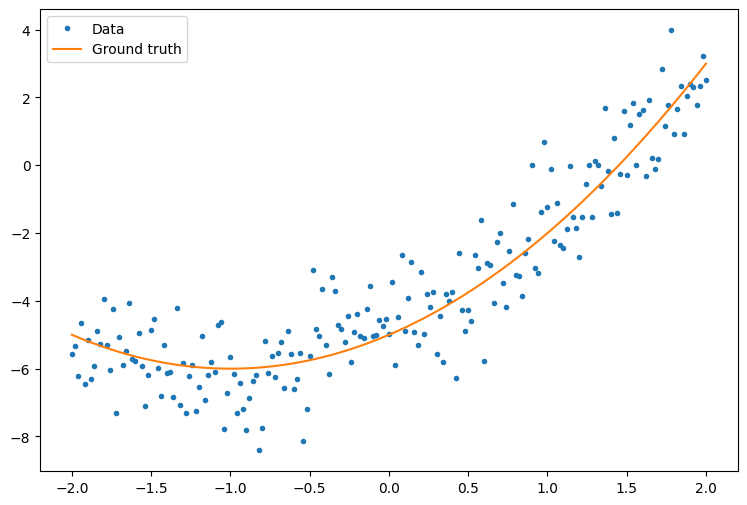

In [33]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [34]:
tf.random.uniform([3,2,4], 0, 10)

<tf.Tensor: shape=(3, 2, 4), dtype=float32, numpy=
array([[[3.7171328 , 1.9361615 , 2.9492867 , 3.8791203 ],
        [2.9696393 , 2.3572695 , 5.3195286 , 5.462451  ]],

       [[7.5271044 , 6.134999  , 6.576023  , 0.26628375],
        [8.135871  , 3.3013558 , 1.5512383 , 5.2545834 ]],

       [[2.9756272 , 3.913505  , 4.871011  , 2.8026664 ],
        [1.1719716 , 3.5831642 , 3.1767356 , 7.543192  ]]], dtype=float32)>

In [35]:
class Model(tf.Module):
    
    def __init__(self):
        random_init = tf.random.uniform([3], 0, 5, dtype=tf.float32, seed=69)
        self.W_1 = tf.Variable(random_init[0], name='W_1')
        self.W_2 = tf.Variable(random_init[1], name='W_2')
        self.b = tf.Variable(random_init[2], name='b')
        
    def __call__(self, x):
        return self.W_2 * x**2 + self.W_1 * x + self.b

In [36]:
model = Model()

In [37]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x, y, '.', label='Data')
    plt.plot(x, f(x), label='Ground truth')
    plt.plot(x, model(x), label='Predictions')
    plt.title(title)
    plt.legend()

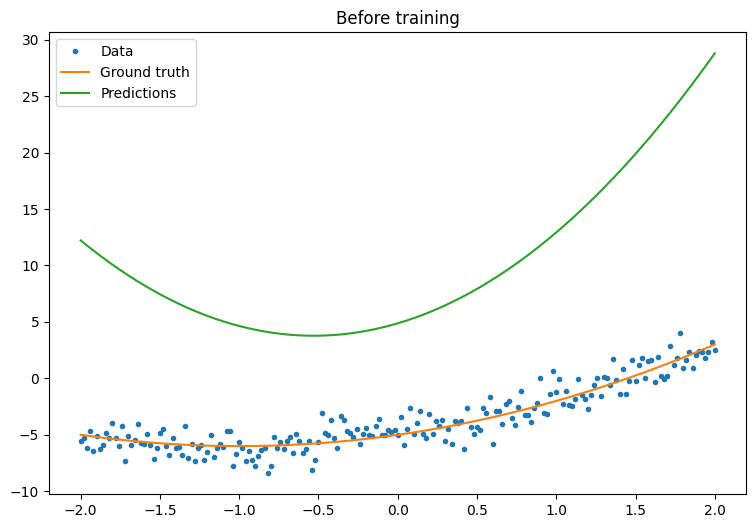

In [38]:
plot_preds(x, y, f, model, 'Before training')

In [39]:
def mse_loss(y_true, y_pred):
    return tf.reduce_mean((y_true - y_pred)**2)

In [40]:
list(tf.data.Dataset.from_tensor_slices((x, y)))

[(<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.571368>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.98>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.31647>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.96>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-6.2093663>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.94>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-4.6562586>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.92>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-6.4621997>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.9>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.1452274>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.88>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-6.2956486>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.86>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.923109>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.84>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-4.879923>),

In [41]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [42]:
list(dataset)[-1]

(<tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([-1.4 ,  0.18, -1.24,  0.16,  0.82,  1.08, -0.72, -0.8 ,  0.72],
       dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([-6.129962 , -5.3021674, -5.8887506, -4.9297   , -3.2751508,
        -2.3413043, -6.2486367, -7.7508664, -3.4821792], dtype=float32)>)

In [43]:
model.variables

(<tf.Variable 'W_1:0' shape=() dtype=float32, numpy=4.1439056>,
 <tf.Variable 'W_2:0' shape=() dtype=float32, numpy=3.9076905>,
 <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.8737946>)

(<tf.Tensor: shape=(), dtype=float32, numpy=6.597108>, <tf.Tensor: shape=(), dtype=float32, numpy=47.247208>, <tf.Tensor: shape=(), dtype=float32, numpy=27.904003>)

(<tf.Tensor: shape=(), dtype=float32, numpy=13.393969>, <tf.Tensor: shape=(), dtype=float32, numpy=35.30021>, <tf.Tensor: shape=(), dtype=float32, numpy=25.882847>)

(<tf.Tensor: shape=(), dtype=float32, numpy=3.221352>, <tf.Tensor: shape=(), dtype=float32, numpy=38.32599>, <tf.Tensor: shape=(), dtype=float32, numpy=23.766161>)

(<tf.Tensor: shape=(), dtype=float32, numpy=8.493671>, <tf.Tensor: shape=(), dtype=float32, numpy=44.742657>, <tf.Tensor: shape=(), dtype=float32, numpy=24.206415>)

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.7999513>, <tf.Tensor: shape=(), dtype=float32, numpy=32.523502>, <tf.Tensor: shape=(), dtype=float32, numpy=20.314842>)

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.5367487>, <tf.Tensor: shape=(), dtype=float32, numpy=27.132751>, <tf.Tensor: shape=(), dtype=float32, numpy=18.79535>)

(<

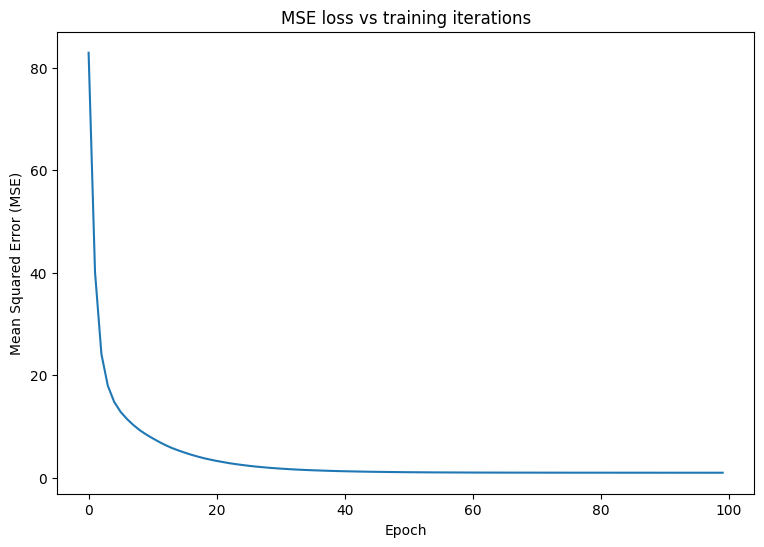

In [44]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(model(x_batch), y_batch)
        # Update parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, model.variables)
        print(grads,end="\n\n")
        for g,v in zip(grads, model.variables):
            v.assign_sub(learning_rate*g)
    # Keep track of model loss per epoch
    loss = mse_loss(model(x), y)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

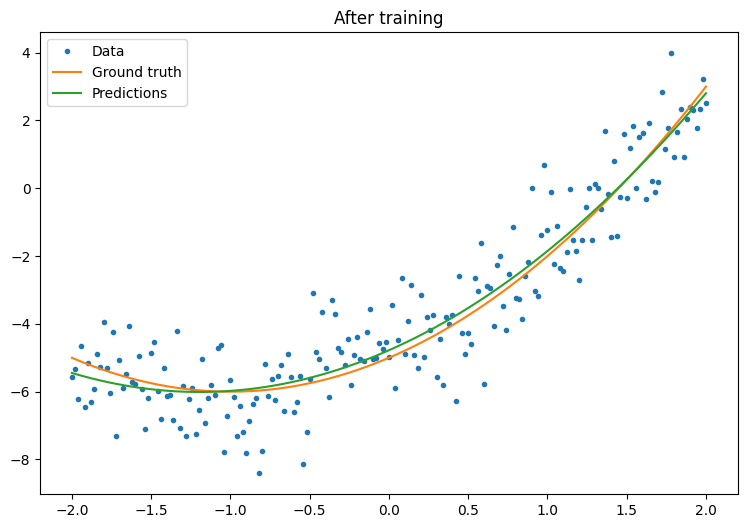

In [45]:
plot_preds(x, y, f, model, 'After training')


In [46]:
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42, 

In [47]:
np.array(x[:10])

array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82], dtype=float32)

In [48]:
tensor_1 = tf.random.normal(shape=(2, 3, 3, 2))
tensor_2 = tf.random.normal(shape=(2, 3, 2, 4))


In [49]:
tensor_1

<tf.Tensor: shape=(2, 3, 3, 2), dtype=float32, numpy=
array([[[[ 0.06480846, -0.8595003 ],
         [ 2.5708497 ,  1.205727  ],
         [-0.11815628, -1.7515967 ]],

        [[ 0.12630624,  0.9930398 ],
         [ 0.8115047 , -1.2102257 ],
         [-0.09108324, -0.23203284]],

        [[ 0.4344537 , -2.3293731 ],
         [-0.07721136, -1.6331713 ],
         [-1.6380389 ,  0.5196037 ]]],


       [[[ 0.783134  ,  0.4063585 ],
         [ 0.3250108 , -0.12103881],
         [ 0.41500282, -0.11546139]],

        [[-0.97452605, -1.5480261 ],
         [-0.9323806 , -0.32643837],
         [ 0.9432716 ,  1.0664709 ]],

        [[ 0.724925  , -0.96096295],
         [ 0.7199119 ,  0.74198395],
         [ 0.4173043 , -0.2491333 ]]]], dtype=float32)>

In [50]:
tensor_2

<tf.Tensor: shape=(2, 3, 2, 4), dtype=float32, numpy=
array([[[[ 2.3594215 , -0.0530103 ,  2.3938258 , -1.5055194 ],
         [-2.0522866 , -1.1382831 , -0.9176793 , -0.37976682]],

        [[-0.8707528 , -0.5319873 , -0.52734447, -0.1938464 ],
         [ 0.784721  , -0.9999267 ,  0.55919635,  1.4138149 ]],

        [[-0.40702984, -1.352975  , -0.36585093, -0.76533836],
         [-0.93541205, -0.9519881 ,  0.45736694,  0.30470374]]],


       [[[-0.75186425,  1.8464589 ,  0.43657073, -0.55520207],
         [-0.1098896 , -1.0086123 , -0.43581134, -0.23714584]],

        [[ 2.0109885 ,  0.7216475 ,  0.20023715,  0.5114955 ],
         [-1.0906982 , -0.7306307 , -0.3999729 ,  0.45719108]],

        [[ 1.4439087 , -1.5157272 , -1.3727067 ,  1.7786933 ],
         [ 0.27617657,  0.5345636 , -0.83994466,  0.56073296]]]],
      dtype=float32)>

In [51]:

tensor_1 @ tensor_2

<tf.Tensor: shape=(2, 3, 3, 4), dtype=float32, numpy=
array([[[[ 1.9168514 ,  0.9749192 ,  0.9438858 ,  0.22883931],
         [ 3.5912204 , -1.5087402 ,  5.0476956 , -4.328359  ],
         [ 3.315998  ,  2.0000765 ,  1.3245585 ,  0.8430849 ]],

        [[ 0.66927767, -1.0601603 ,  0.48869735,  1.3794904 ],
         [-1.6563096 ,  0.77842677, -1.1046963 , -1.8683424 ],
         [-0.10277005,  0.28047094, -0.08171968, -0.31039533]],

        [[ 2.002088  ,  1.6297305 , -1.2243236 , -1.0422728 ],
         [ 1.5591155 ,  1.6592246 , -0.7187107 , -0.4385406 ],
         [ 0.1806871 ,  1.7215691 ,  0.8369276 ,  1.4119792 ]]],


       [[[-0.633465  ,  1.0361667 ,  0.16479772, -0.5311639 ],
         [-0.2310631 ,  0.72220033,  0.1946403 , -0.15174282],
         [-0.29933777,  0.88274145,  0.23149747, -0.20302925]],

        [[-0.2713313 ,  0.42777103,  0.42403215, -1.2062094 ],
         [-1.518961  , -0.43434423, -0.05613075, -0.6261532 ],
         [ 0.7337104 , -0.09848672, -0.2376814 ,  0.97

In [52]:
c = tf.constant([[4.0, 1.0], [10.0, 5.0]])
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 4.,  1.],
       [10.,  5.]], dtype=float32)>

In [53]:

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.math.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 1], shape=(2,), dtype=int64)
tf.Tensor(
[[0.95257413 0.04742587]
 [0.9933072  0.00669285]], shape=(2, 2), dtype=float32)


In [54]:
type(c.shape)

tensorflow.python.framework.tensor_shape.TensorShape

In [55]:
tf.convert_to_tensor(c.shape)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2], dtype=int32)>

In [56]:
tf.size(x).numpy()

201

In [57]:
tf.shape(c)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2], dtype=int32)>

In [58]:
tf.rank(c)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [59]:
t2 = tf.constant([[0, 1, 2, 3, 4],
                    [5, 6, 7, 8, 9],
                    [10, 11, 12, 13, 14],
                    [15, 16, 17, 18, 19]])
t2

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]], dtype=int32)>

In [60]:
test = tf.random.uniform((4,2,3,2))
test

<tf.Tensor: shape=(4, 2, 3, 2), dtype=float32, numpy=
array([[[[5.2217066e-01, 8.0515516e-01],
         [8.5390806e-02, 7.0947850e-01],
         [9.1560435e-01, 4.6035779e-01]],

        [[1.2569642e-01, 7.6191568e-01],
         [8.4142041e-01, 8.2983613e-01],
         [7.3566592e-01, 4.0072370e-01]]],


       [[[7.8401923e-01, 3.2170200e-01],
         [2.6103699e-01, 1.9228637e-01],
         [9.7849238e-01, 5.7815313e-01]],

        [[5.3200459e-01, 2.7039444e-01],
         [9.8264956e-01, 8.8784146e-01],
         [5.3738141e-01, 1.4053345e-02]]],


       [[[3.7835908e-01, 4.7747350e-01],
         [6.9111848e-01, 4.1787410e-01],
         [2.1990418e-01, 3.5342109e-01]],

        [[4.4906414e-01, 4.3708587e-01],
         [5.8753324e-01, 4.3473184e-01],
         [1.9362319e-01, 5.3629506e-01]]],


       [[[5.6086934e-01, 5.9861386e-01],
         [4.7895575e-01, 1.8520546e-01],
         [2.4085236e-01, 6.5377152e-01]],

        [[8.0700052e-01, 6.5368986e-01],
         [3.2569242e-01,

In [61]:
tf.reshape(test, (48,1))

<tf.Tensor: shape=(48, 1), dtype=float32, numpy=
array([[5.2217066e-01],
       [8.0515516e-01],
       [8.5390806e-02],
       [7.0947850e-01],
       [9.1560435e-01],
       [4.6035779e-01],
       [1.2569642e-01],
       [7.6191568e-01],
       [8.4142041e-01],
       [8.2983613e-01],
       [7.3566592e-01],
       [4.0072370e-01],
       [7.8401923e-01],
       [3.2170200e-01],
       [2.6103699e-01],
       [1.9228637e-01],
       [9.7849238e-01],
       [5.7815313e-01],
       [5.3200459e-01],
       [2.7039444e-01],
       [9.8264956e-01],
       [8.8784146e-01],
       [5.3738141e-01],
       [1.4053345e-02],
       [3.7835908e-01],
       [4.7747350e-01],
       [6.9111848e-01],
       [4.1787410e-01],
       [2.1990418e-01],
       [3.5342109e-01],
       [4.4906414e-01],
       [4.3708587e-01],
       [5.8753324e-01],
       [4.3473184e-01],
       [1.9362319e-01],
       [5.3629506e-01],
       [5.6086934e-01],
       [5.9861386e-01],
       [4.7895575e-01],
       [1.85205

In [62]:
tf.broadcast_to(tf.random.uniform([1,2]), (4,2,))

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.7457899 , 0.19910395],
       [0.7457899 , 0.19910395],
       [0.7457899 , 0.19910395],
       [0.7457899 , 0.19910395]], dtype=float32)>

In [63]:
a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print(a.numpy())
print(b.numpy())

# There are other versions of assign
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]

[5. 6.]
[2. 3.]
[7. 9.]
[0. 0.]


In [64]:
# Uncomment to see where your variables get placed (see below)
tf.debugging.set_log_device_placement(True)

In [65]:
tf.Variable([1.0, 2.0, 3.0]).device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [66]:

devices = tf.config.list_physical_devices()
for device in devices:
    print(device)


PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [96]:
x = tf.Variable([1.0, 2.0, 3.0])
with tf.GradientTape(persistent=True) as tape:
    y0 = x**2
    y1 = (tf.reshape(x, (3,1))) @ tf.reshape(x, (1,3))

print(tape.gradient(y0, x).numpy())
#tape.gradient(y1, x).numpy()
tape.jacobian(y1, x).numpy()

# print(tape.gradient([y0,y1], x))


[2. 4. 6.]


array([[[2., 0., 0.],
        [2., 1., 0.],
        [3., 0., 1.]],

       [[2., 1., 0.],
        [0., 4., 0.],
        [0., 3., 2.]],

       [[3., 0., 1.],
        [0., 3., 2.],
        [0., 0., 6.]]], dtype=float32)

In your case, y1 is a 3x3 matrix and x is a vector of length 3. Therefore, the Jacobian is a 3x3x3 tensor, where the element at position (i, j, k) is the derivative of y1[i, j] with respect to x[k].

Here's how the values are computed:

The first row of the Jacobian for each element of y1 is [2, 0, 0] because y1[0, 0], y1[1, 0], and y1[2, 0] are x[0]**2, x[0] * x[1], and x[0] * x[2] respectively. The derivative of these expressions with respect to x[0] is 2x[0], x[1], and x[2], ...

The second row of the Jacobian for each element of y1 is [2, 1, 0], [0, 4, 0], and [0, 3, 2] because y1[0, 1], y1[1, 1], and y1[2, 1] are x[0] * x[1], x[1]**2, and x[1] * x[2] respectively. The derivative of these expressions with respect to x[0] is x[1], 2x[1], and x[2], ...

The third row of the Jacobian for each element of y1 is [3, 0, 1], [0, 3, 2], and [0, 0, 6] because y1[0, 2], y1[1, 2], and y1[2, 2] are x[0] * x[2], x[1] * x[2], and x[2]**2 respectively. The derivative of these expressions with respect to x[0] is x[2], 0, and 2x[2], ...

So, the Jacobian of y1 with respect to x is indeed the 3x3x3 tensor you've printed.

In [88]:
tf.reshape(x, (3,1)) @ tf.reshape(x, (1,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]], dtype=float32)>

In [75]:
x = tf.Variable(2.)

with tf.GradientTape(persistent=True) as tape:
    y = x * [3., 4.]
    print(y)

print(tape.gradient(y, x).numpy())
print(tape.jacobian(y, x).numpy())

tf.Tensor([6. 8.], shape=(2,), dtype=float32)
7.0
[3. 4.]


In [80]:
x = tf.linspace(-10.0, 10.0, 200+1)
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-10.        ,  -9.9       ,  -9.8       ,  -9.7       ,
        -9.6       ,  -9.5       ,  -9.4       ,  -9.3       ,
        -9.2       ,  -9.1       ,  -9.        ,  -8.9       ,
        -8.8       ,  -8.7       ,  -8.6       ,  -8.5       ,
        -8.4       ,  -8.3       ,  -8.2       ,  -8.1       ,
        -8.        ,  -7.8999996 ,  -7.8       ,  -7.7       ,
        -7.6       ,  -7.5       ,  -7.3999996 ,  -7.3       ,
        -7.2       ,  -7.1       ,  -7.        ,  -6.8999996 ,
        -6.8       ,  -6.7       ,  -6.6       ,  -6.5       ,
        -6.3999996 ,  -6.3       ,  -6.2       ,  -6.1       ,
        -6.        ,  -5.9       ,  -5.7999997 ,  -5.7       ,
        -5.6       ,  -5.5       ,  -5.4       ,  -5.2999997 ,
        -5.2       ,  -5.1       ,  -5.        ,  -4.9       ,
        -4.7999997 ,  -4.7       ,  -4.6       ,  -4.5       ,
        -4.4       ,  -4.2999997 ,  -4.2       ,  -4.1       ,
       

In [81]:

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)
dy_dx

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([4.53958055e-05, 5.01696704e-05, 5.54454418e-05, 6.12759977e-05,
       6.77195349e-05, 7.48406237e-05, 8.27104013e-05, 9.14074917e-05,
       1.01019010e-04, 1.11640838e-04, 1.23379359e-04, 1.36351780e-04,
       1.50687600e-04, 1.66530357e-04, 1.84037955e-04, 2.03385600e-04,
       2.24766321e-04, 2.48393306e-04, 2.74502789e-04, 3.03354813e-04,
       3.35237681e-04, 3.70468944e-04, 4.09399334e-04, 4.52417444e-04,
       4.99951013e-04, 5.52473066e-04, 6.10506453e-04, 6.74626906e-04,
       7.45472440e-04, 8.23745097e-04, 9.10221133e-04, 1.00575760e-03,
       1.11129810e-03, 1.22788735e-03, 1.35667447e-03, 1.49892876e-03,
       1.65605021e-03, 1.82957877e-03, 2.02121865e-03, 2.23284075e-03,
       2.46650912e-03, 2.72449665e-03, 3.00930603e-03, 3.32368701e-03,
       3.67066660e-03, 4.05357173e-03, 4.47605597e-03, 4.94213449e-03,
       5.45620080e-03, 6.02308055e-03, 6.64805667e-03, 7.33690569e-03,
       8.09594523e-03, 8.9320

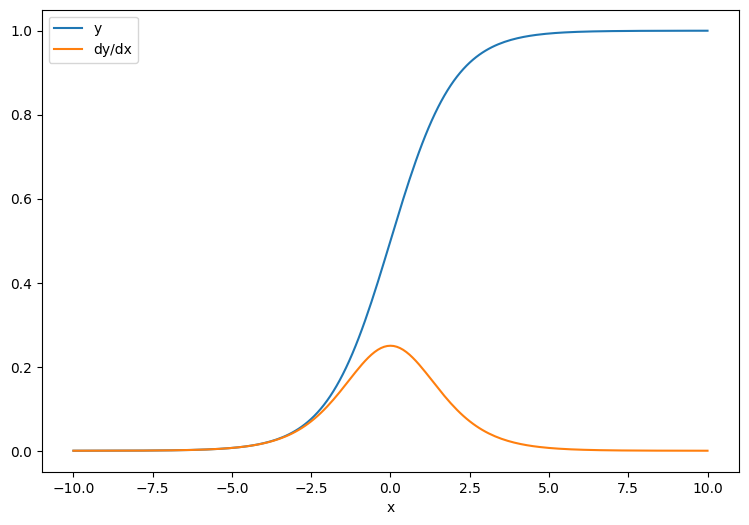

In [78]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

In [107]:
x = tf.constant(3.0)

v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    if x > 0.0:
        result = v0 
    else: 
        result = v1**2 *x

dv0, dv1,dvx = tape.gradient(result, [v0, v1,x])

print(dv0)
print(dv1)
print(dvx)


tf.Tensor(1.0, shape=(), dtype=float32)
None
None


In [108]:
x = tf.Variable(2.0)

for epoch in range(2):
  with tf.GradientTape() as tape:
    y = x+1

  print(type(x).__name__, ":", tape.gradient(y, x))
  x = x + 1   # This should be `x.assign_add(1)`

ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
EagerTensor : None


In [120]:
x = tf.Variable([[1.0, 2.0],
                 [3.0, 4.0]], dtype=tf.float32)

with tf.GradientTape() as tape:
  x2 = x**2

  # This step is calculated with NumPy
  y = tf.reduce_mean(x2, axis=0)

  # Like most ops, reduce_mean will cast the NumPy array to a constant tensor
  # using `tf.convert_to_tensor`.
  y = tf.reduce_mean(y, axis=0)

print(tape.gradient(y, x))

tf.Tensor(
[[0.5 1. ]
 [1.5 2. ]], shape=(2, 2), dtype=float32)


In [116]:
np.mean(x2, axis=0)

array([ 5., 10.], dtype=float32)

In [117]:
tf.reduce_mean(np.mean(x2, axis=0), axis=0)

<tf.Tensor: shape=(), dtype=float32, numpy=7.5>

In [123]:
x**2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.,  4.],
       [ 9., 16.]], dtype=float32)>

In [124]:
a

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [125]:
x+a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [149]:
x0 = tf.Variable(5.0)
x1 = tf.Variable(1.0)

with tf.GradientTape() as tape:
    x3 = x1+x0+x1
#   x1.assign_add(x0)
  # The tape starts recording from x1.
    y = x3**2   # y = (x1 + x0)**2

# This doesn't work.
print(tape.gradient(y, x1))   #dy/dx0 = 2*(x1 + x0)
print(tape.watched_variables())

tf.Tensor(28.0, shape=(), dtype=float32)
(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>)
